In [1]:
# %%
import os
from IPython import embed
import bopt
import scipy
import matplotlib.pyplot as plt
import matplotlib
import torch
import torch.nn as nn
import asimov as asmv
import numpy as np
import datetime
import wandb
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib as mpl
import torch.nn.functional as F
import h5py as h5
import seaborn as sns


# Notebook for Evaluating Model Performance During Repeated Stimulus Presentation

In [2]:
# %%
# Set global experiment parameters
charmander_h5_filepath = '/mnt/data/ctx/charm_50_rec.h5'
goldrodger_h5_filepath = '/mnt/data/ctx/goldroger_rec_50b_reconstructed.h5'
sample_rate = 50
device = bopt.cuda_init()  # Using specific GPU
# device='cuda:7'
samplerate = 50
num_before = 25
num_after = 5
seed = 2222
torch.random.manual_seed(seed)
# which_clusters = [
#     4, 15, 41, 42, 43, 50, 62, 107, 121, 168, 225, 226, 245, 251, 259, 261,
#     263, 271, 282, 294, 302, 327, 334, 340, 342, 347, 363, 364, 367, 375, 400,
#     555
# ]
series='series_008'
direction='shifted'



--- device:0 has 715
--- device:1 has 1021
--- device:2 has 9
--- device:3 has 9
--- device:4 has 9
--- device:5 has 9
--- device:6 has 9
--- device:7 has 9
Selected device: cuda:2


# Load a Model for Test

In [3]:
charm_bestcells="/home/zalaoui/charmander_bestcells/charmander_shifted_bestcells_v5/final_model.pt"
goldroger_bestcells="/home/zalaoui/goldrodger/goldrodger_shifted_bestcells_v4/final_model.pt"
charmander_clusters= [ 4, 15, 41, 42, 43, 50, 62, 107, 121, 168, 225, 226, 245, 251, 259, 261,
    263, 271, 282, 294, 302, 327, 334, 340, 342, 347, 363, 364, 367, 375, 400,
    555
]
goldroger_clusters=[8, 12, 24, 53, 57, 61, 74, 81, 87, 97, 102, 107, 123, 125, 130, 135, 157, 160, 168, 169, 172, 179, 188, 193, 195, 199, 228, 232, 233, 235, 236, 259, 266, 273, 289, 305, 325, 326, 340, 346, 354, 369, 370, 371, 398, 402, 411, 418, 432, 441, 442, 454, 472, 476, 484, 486, 509, 515, 517, 520, 525, 534, 537, 538, 545, 551, 558, 566, 598, 612, 638, 655, 661, 662, 674, 688, 696, 732, 733, 736, 737, 743, 744, 746, 751, 800, 807, 829, 837, 849, 851, 853, 854, 870, 873, 874]

# Test Run

/home/zalaoui/bopt/bopt/evaluation.py:838: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=device)


['series_008/epoch_001', 'series_008/epoch_002', 'series_008/epoch_003', 'series_008/epoch_004', 'series_008/epoch_005', 'series_008/epoch_006', 'series_008/epoch_007', 'series_008/epoch_008', 'series_008/epoch_009', 'series_008/epoch_010']
Zeroing out blinks in stimulus (at init).


Evaluating series_008/epoch_001: 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]


Zeroing out blinks in stimulus (at init).


Evaluating series_008/epoch_002: 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]


Zeroing out blinks in stimulus (at init).


Evaluating series_008/epoch_003: 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]


Zeroing out blinks in stimulus (at init).


Evaluating series_008/epoch_004: 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]


Zeroing out blinks in stimulus (at init).


Evaluating series_008/epoch_005: 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]


Zeroing out blinks in stimulus (at init).


Evaluating series_008/epoch_006: 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]


Zeroing out blinks in stimulus (at init).


Evaluating series_008/epoch_007: 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]


Zeroing out blinks in stimulus (at init).


Evaluating series_008/epoch_008: 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]


Zeroing out blinks in stimulus (at init).


Evaluating series_008/epoch_009: 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]


Zeroing out blinks in stimulus (at init).


Evaluating series_008/epoch_010: 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]
/home/zalaoui/spikesort/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/zalaoui/spikesort/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


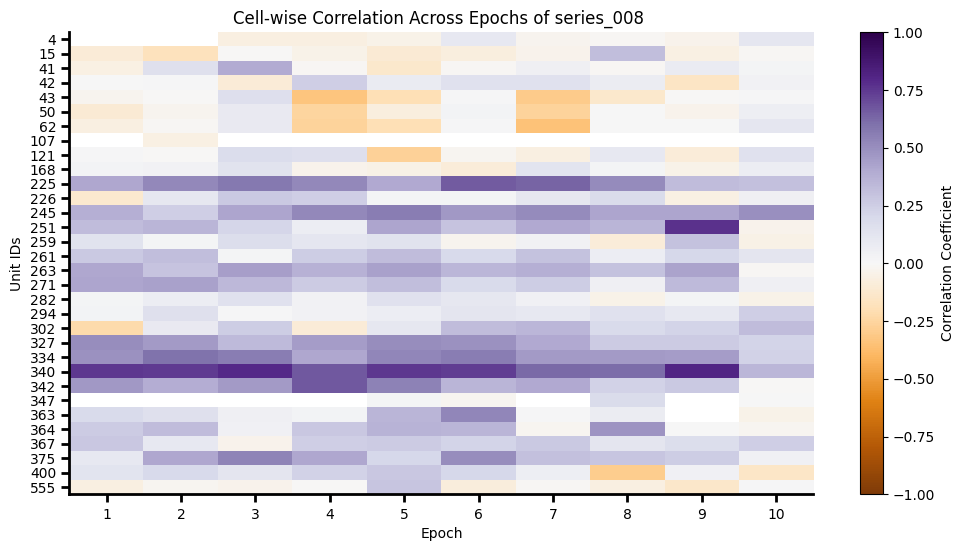

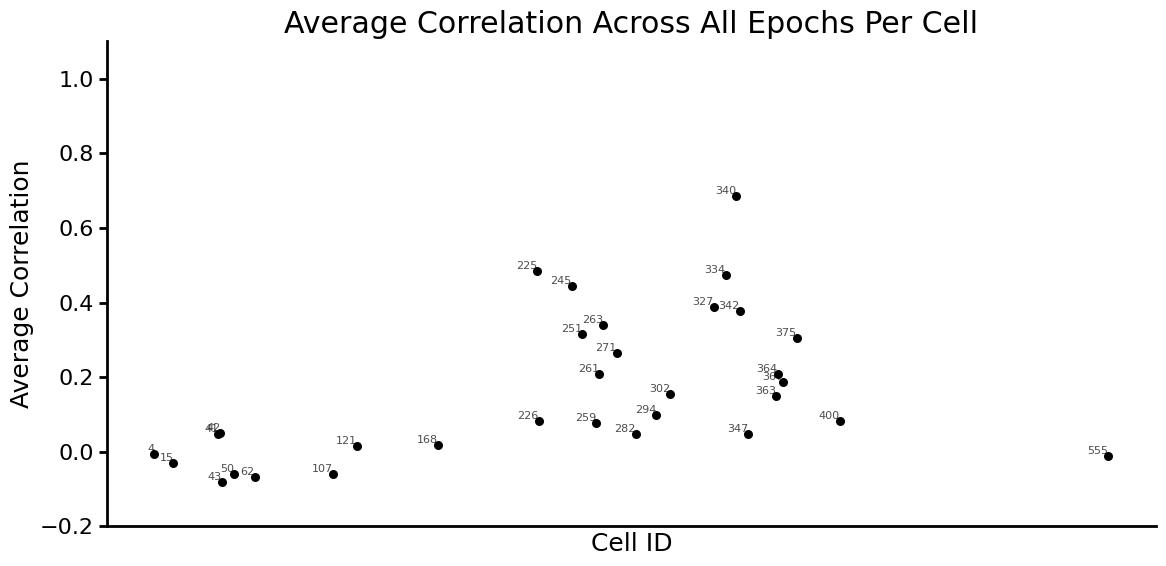

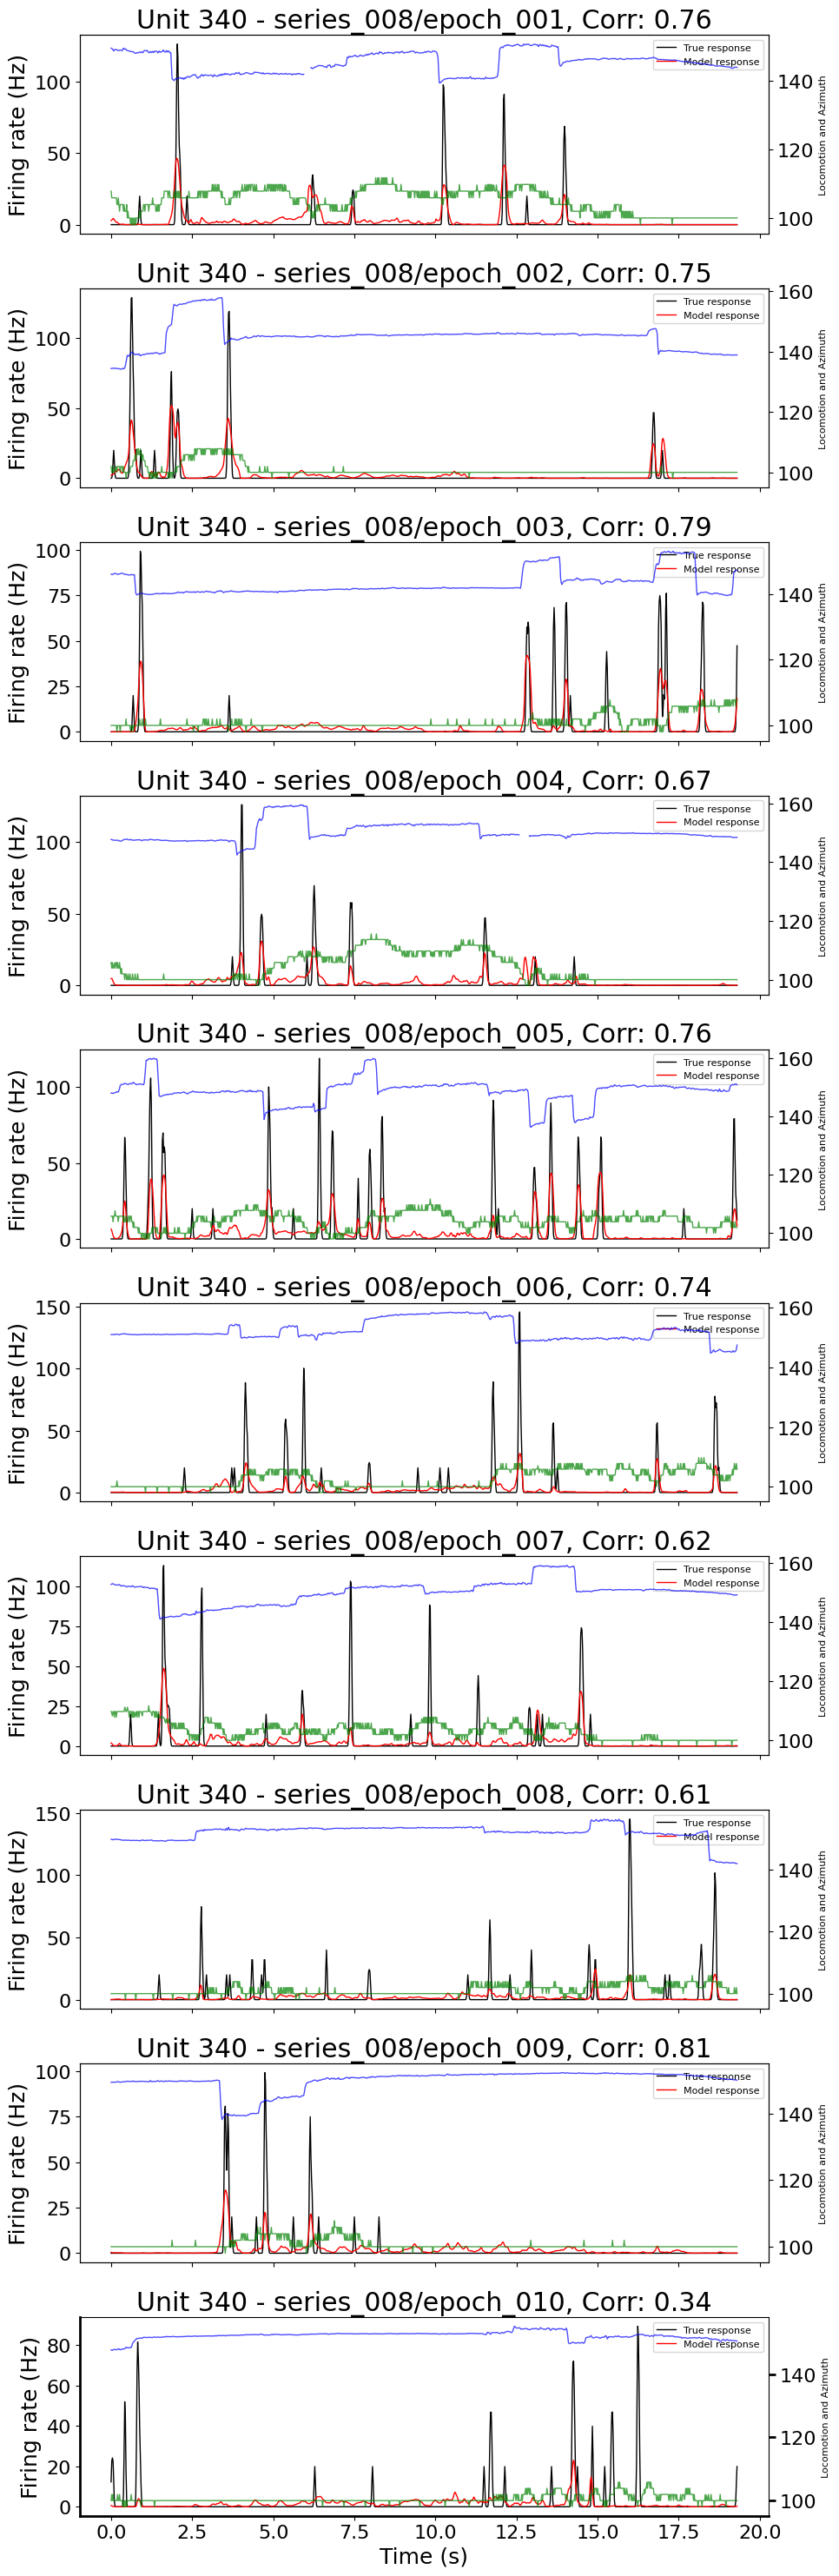

In [4]:
bopt.eval_repeats(
    charm_bestcells,
    charmander_h5_filepath,
    series, # Set to the number of epochs you have in the dataset
    direction,
    device,
    'cnn',
    340,
    charmander_clusters,
    plot=True,
    plot_signals=True
)